<b><h1>Traffic Accident Analysis - USA (2016–2023)</b></h1>

Analyzing traffic accident data to identify patterns related to road conditions, weather, and time of day.
Visualize accident hotspots and contributing factors.

<b><h3>About the Dataset</b></h3>
Source: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

<b><h3>1. Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

<b><h3>2. Reading the Dataset

In [5]:
df = pd.read_csv(r'US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


<b><h3>3. Basic Info About the Dataset

In [7]:
df.shape

(7728394, 46)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


In [11]:
df.describe(include='object')

,ID,Source,Start_Time,End_Time,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,7728394,7728394,7728394,7728394,7728389,7717525,7728141,7728394,7728394,7726479,7728394,7720586,7705759,7608166,7553188,7554935,7705148,7705148,7705148,7705148
unique,7728394,3,6131796,6705355,3761578,336306,13678,1871,49,825094,1,4,2045,941331,24,144,2,2,2,2
top,A-1,Source1,2021-01-26 16:16:13,2021-11-22 08:00:00,A crash has occurred causing no to minimum del...,I-95 N,Miami,Los Angeles,CA,91761,US,US/Eastern,KCQT,2022-03-13 01:53:00,CALM,Fair,Day,Day,Day,Day
freq,1,4325632,225,112,9593,78430,186917,526851,1741433,11247,7728394,3580167,118332,1311,961624,2560802,5334553,5695619,6076156,6377548


<b><h3>4. Data Cleaning and Preprocessing

#### Checking for missing values

In [14]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

#### Dropping columns with too many missing values

In [16]:
df.drop(columns=['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'], axis=1, inplace=True)

#### Fill missing values in categorical columns with mode

In [18]:
categorical = [col for col in df.columns if df[col].dtype == 'O']
for col in categorical:
    df[col].fillna(df[col].mode()[0])

#### Drop remaining weather-related columns

In [20]:
df.drop(columns=['Wind_Speed(mph)', 'Visibility(mi)', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)'], axis=1, inplace=True)

#### Re-check for nulls

In [22]:
df.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   5
Street                    10869
City                        253
County                        0
State                         0
Zipcode                    1915
Country                       0
Timezone                   7808
Airport_Code              22635
Weather_Timestamp        120228
Wind_Direction           175206
Weather_Condition        173459
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_

#### Check for duplicates

In [24]:
df.duplicated().sum()

0

<b><h3>5. Cities with Most and Least Accidents

In [26]:
city_acc = df['City'].value_counts().reset_index()
city_acc.columns = ['City', 'count']

#### Top 10 cities

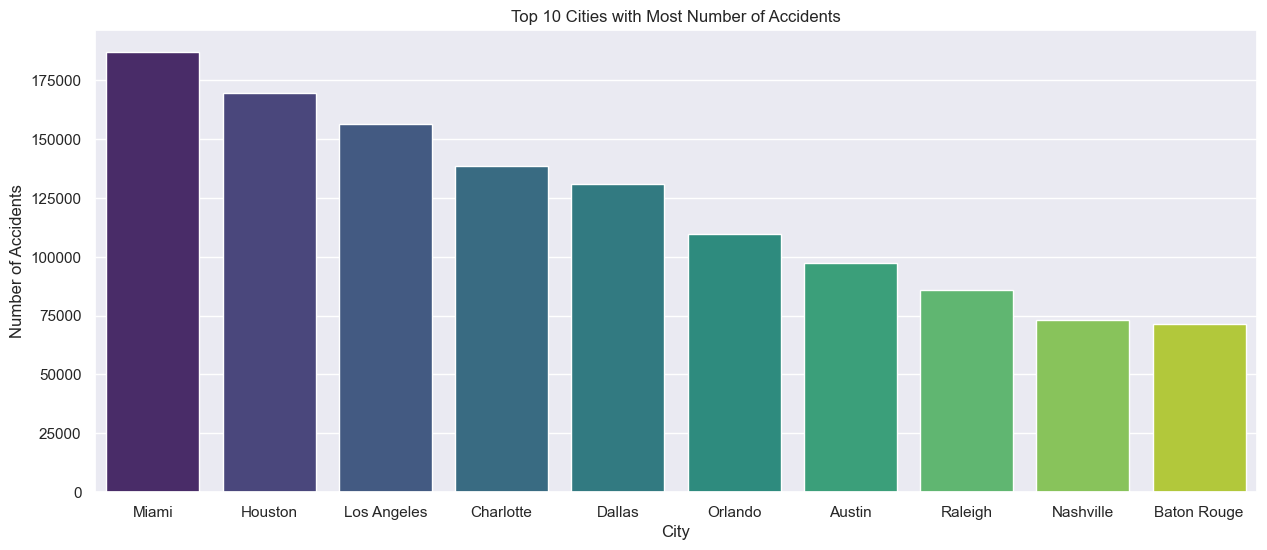

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(x='City', y='count', hue='City', legend=False, data=city_acc.head(10), palette='viridis')
plt.title("Top 10 Cities with Most Number of Accidents")
plt.ylabel("Number of Accidents")
plt.show()

#### Bottom 10 cities

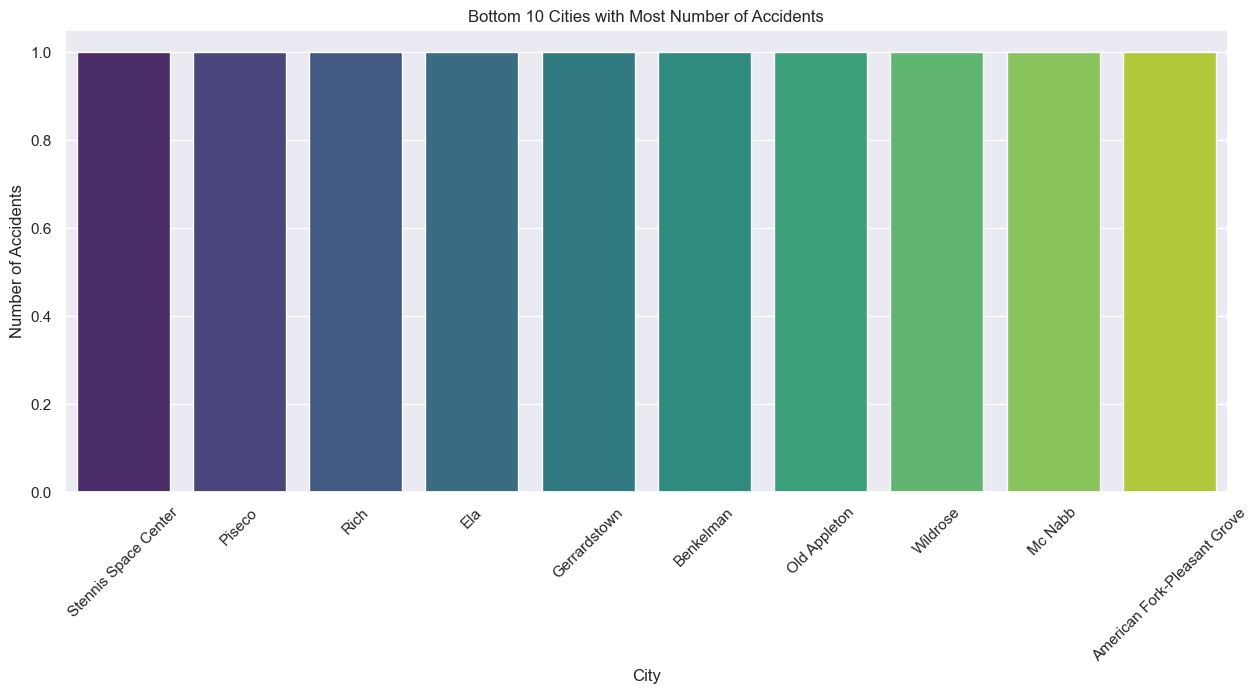

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x='City', y='count', hue='City', legend=False, data=city_acc.tail(10), palette='viridis')
plt.title("Bottom 10 Cities with Most Number of Accidents")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.show()

<b><h3>6. States with Most and Least Accidents

In [32]:
state_acc = df['State'].value_counts().reset_index()
state_acc.columns = ['State', 'count']

#### Top 5 states

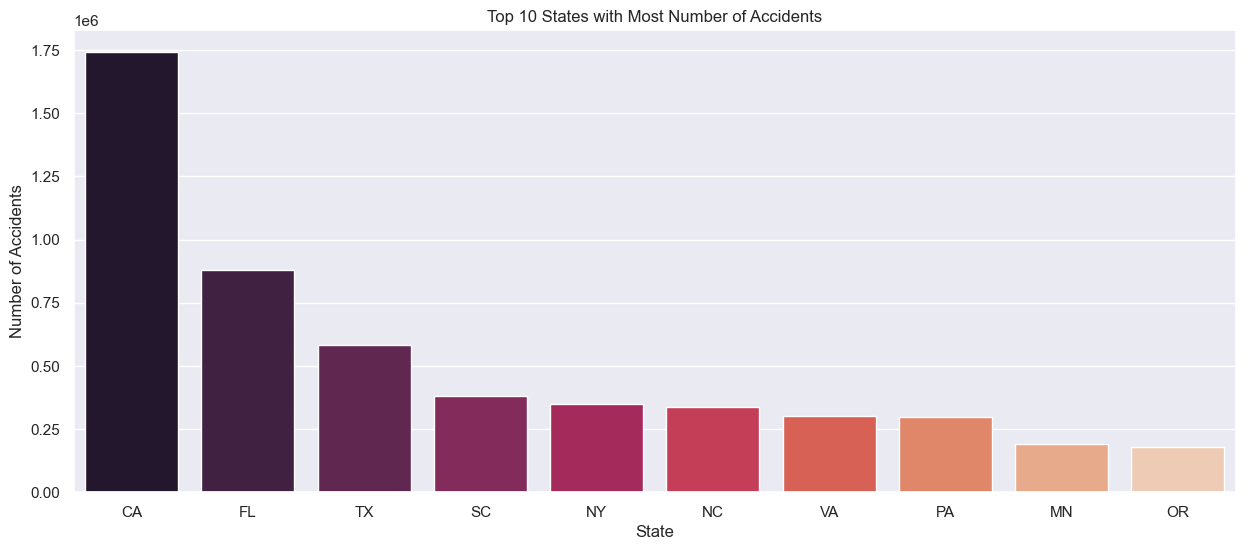

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(x='State', y='count', hue='State', legend=False, data=state_acc.head(10), palette='rocket')
plt.title("Top 10 States with Most Number of Accidents")
plt.ylabel("Number of Accidents")
plt.show()

#### Bottom 5 states

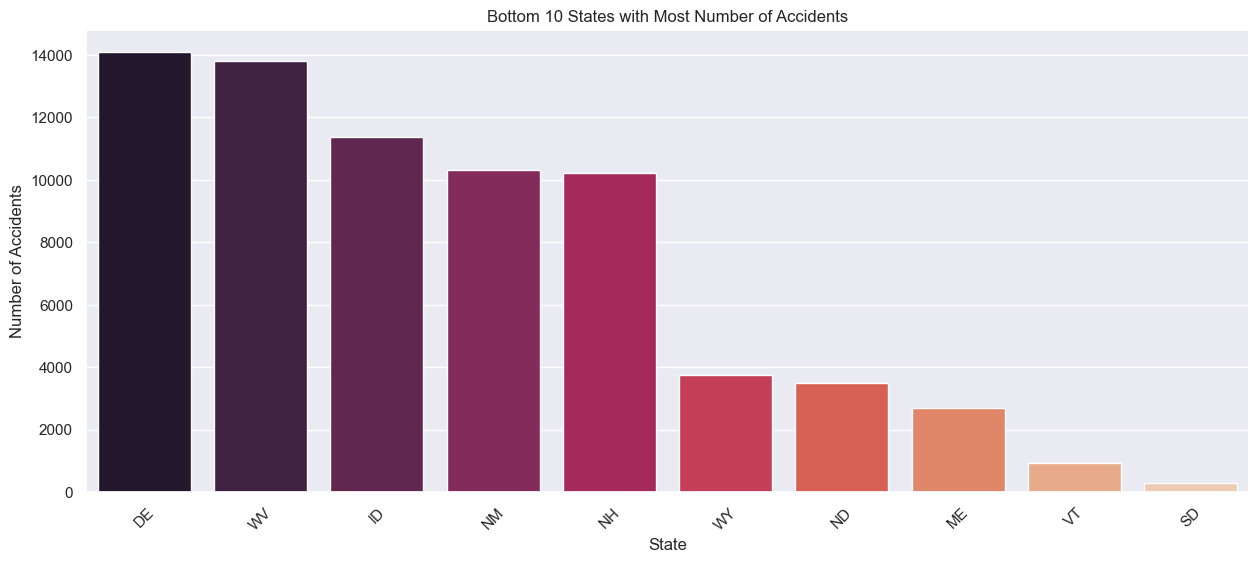

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(x='State', y='count', hue='State', legend=False, data=state_acc.tail(10), palette='rocket')
plt.title("Bottom 10 States with Most Number of Accidents")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.show()

<b><h3>7. Accident Severity Distribution

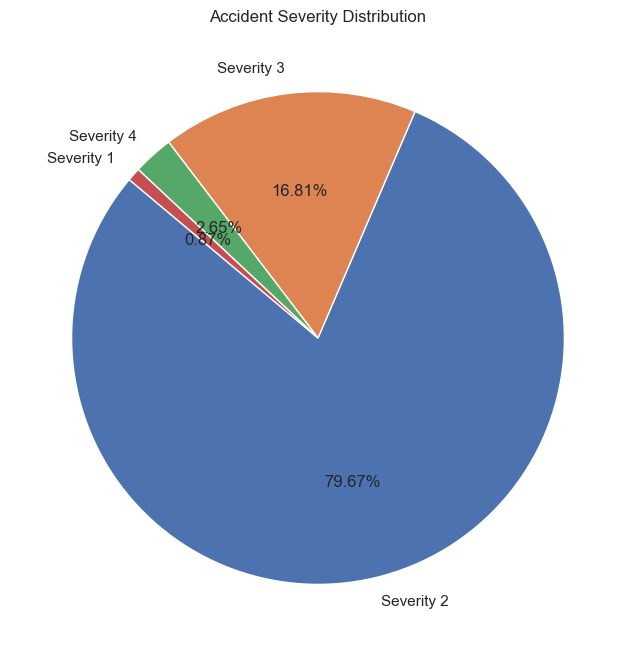

In [38]:
plt.figure(figsize=(8,8))
plt.pie(df['Severity'].value_counts(), labels=['Severity 2', 'Severity 3', 'Severity 4', 'Severity 1'], autopct='%1.2f%%', startangle=140)
plt.title('Accident Severity Distribution')
plt.show()

<b><h3>8. Year-wise Accident Trends

In [40]:
df['Start_time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Year'] = df['Start_time'].dt.year

In [41]:
year_count = df['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'count']

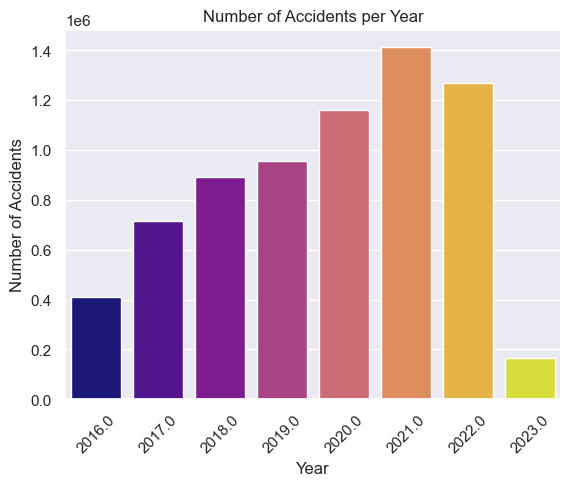

In [42]:
sns.barplot(x='Year', y='count', hue='Year', legend=False, data=year_count, palette='plasma')
plt.title("Number of Accidents per Year")
plt.ylabel("Number of Accidents")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

<b><h3>9. Accidents by Time of Day

#### Extract just the hour from datetime

In [45]:
df['Hour'] = pd.to_datetime(df['Start_time']).dt.hour

#### Define bins and labels

In [47]:
bins = [0, 5, 12, 17, 21, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening', 'Late Night']

#### Cut into time zones

In [49]:
df['Time_Zone'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False, include_lowest=True)

#### Drop rows with NaN in 'Time_Zone'

In [51]:
df = df.dropna(subset=['Time_Zone'])

#### Bar Plot

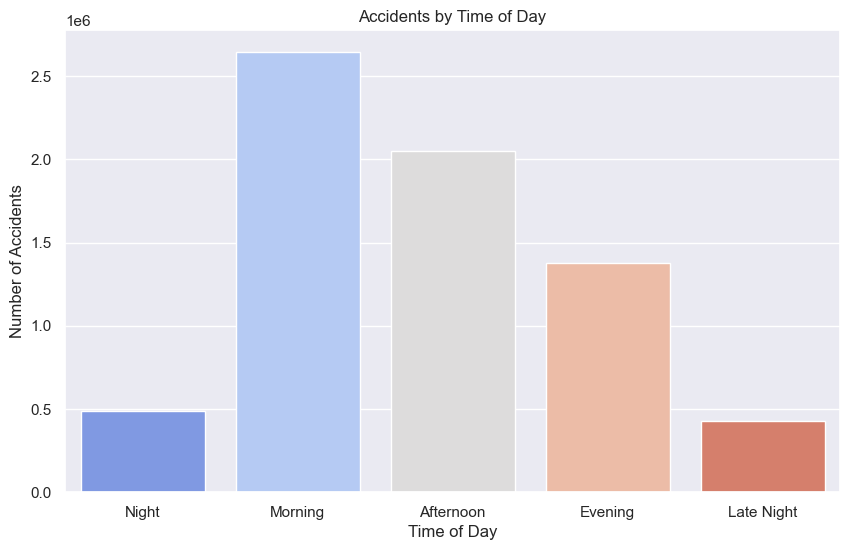

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Time_Zone'].value_counts().sort_index().index, y=df['Time_Zone'].value_counts().sort_index().values, hue=df['Time_Zone'].value_counts().sort_index().index, legend=False, palette='coolwarm')
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Time of Day")
plt.show()

#### Histogram

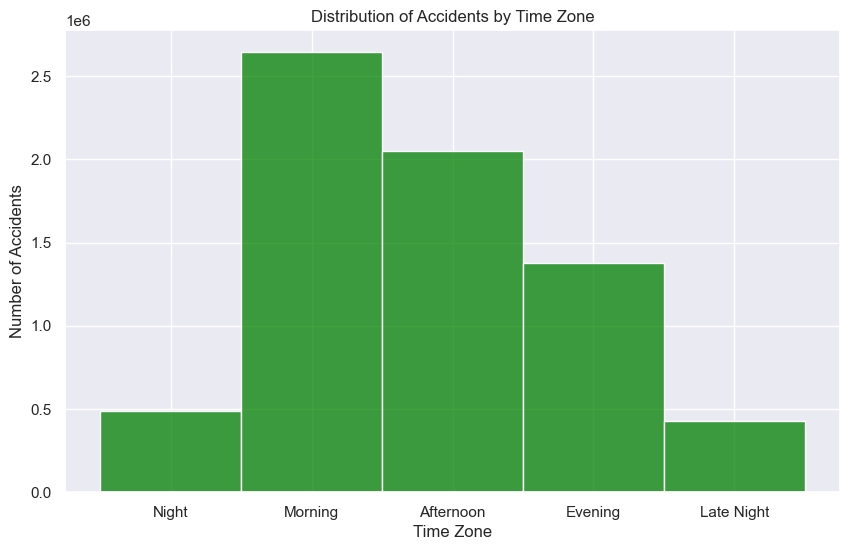

In [55]:
plt.figure(figsize=(10,6))
sns.histplot(df['Time_Zone'], bins=4, color='green')
plt.xlabel('Time Zone')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Time Zone')
plt.show()

<b><h3>10. Weather Conditions During Accidents

In [57]:
weather = df['Weather_Condition'].value_counts().reset_index()
weather.columns = ['Weather_Condition', 'count']

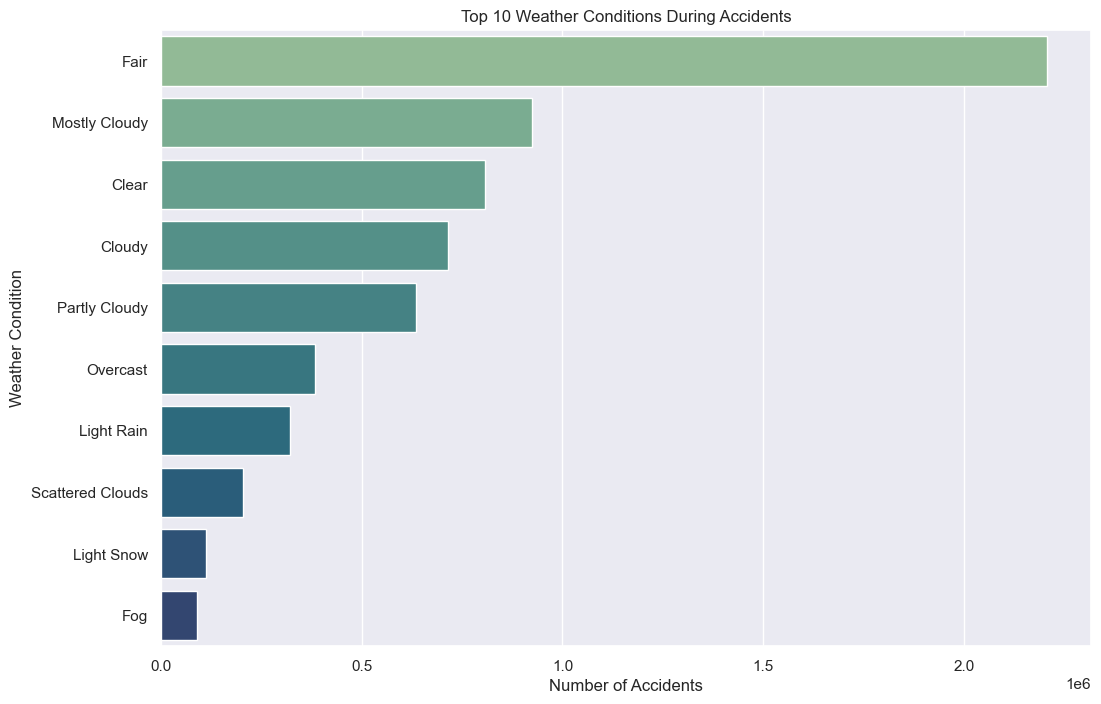

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(y='Weather_Condition', x='count', hue='Weather_Condition', legend=False, data=weather.head(10), palette='crest')
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

<b><h3>11. Accident Location Map (Scatter Plot)

#### By State

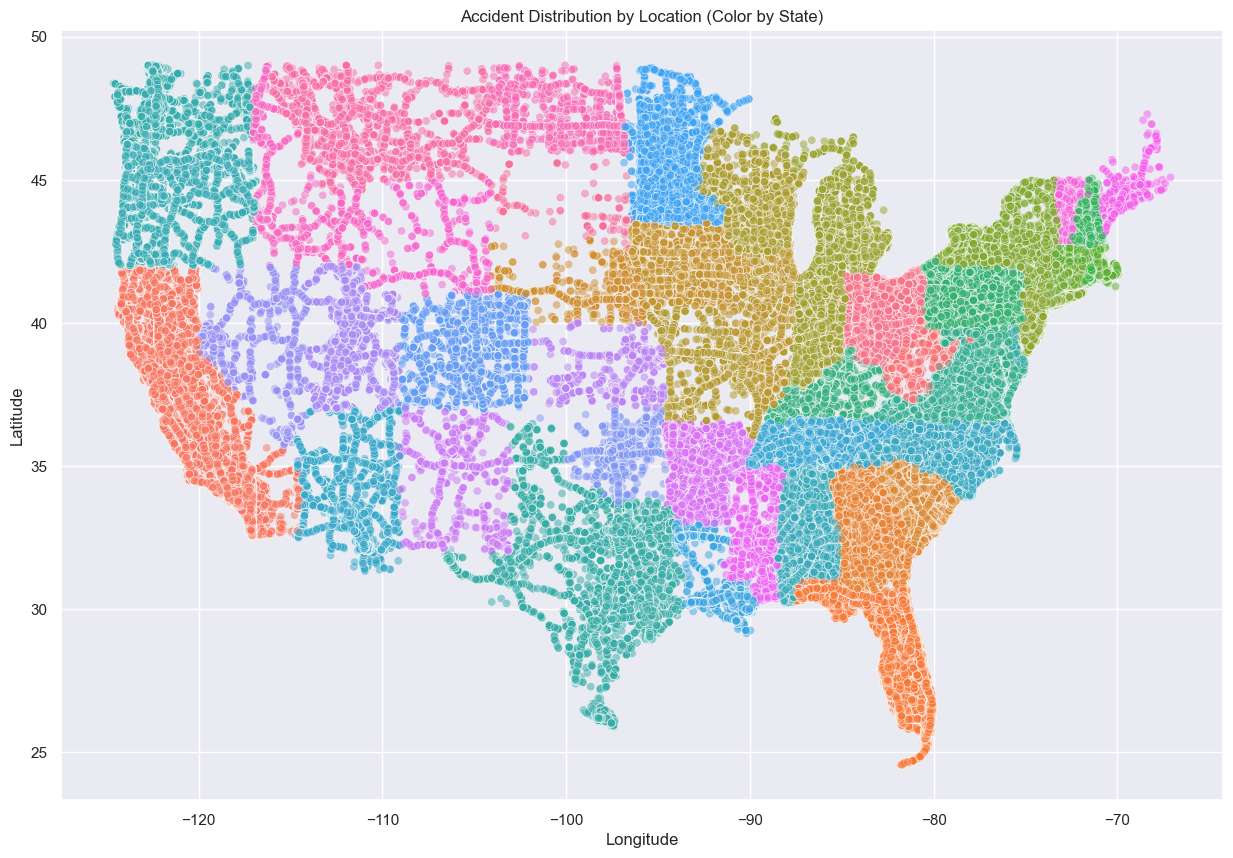

In [61]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='State', data=df, alpha=0.5, legend=False)
plt.title("Accident Distribution by Location (Color by State)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#### By Severity

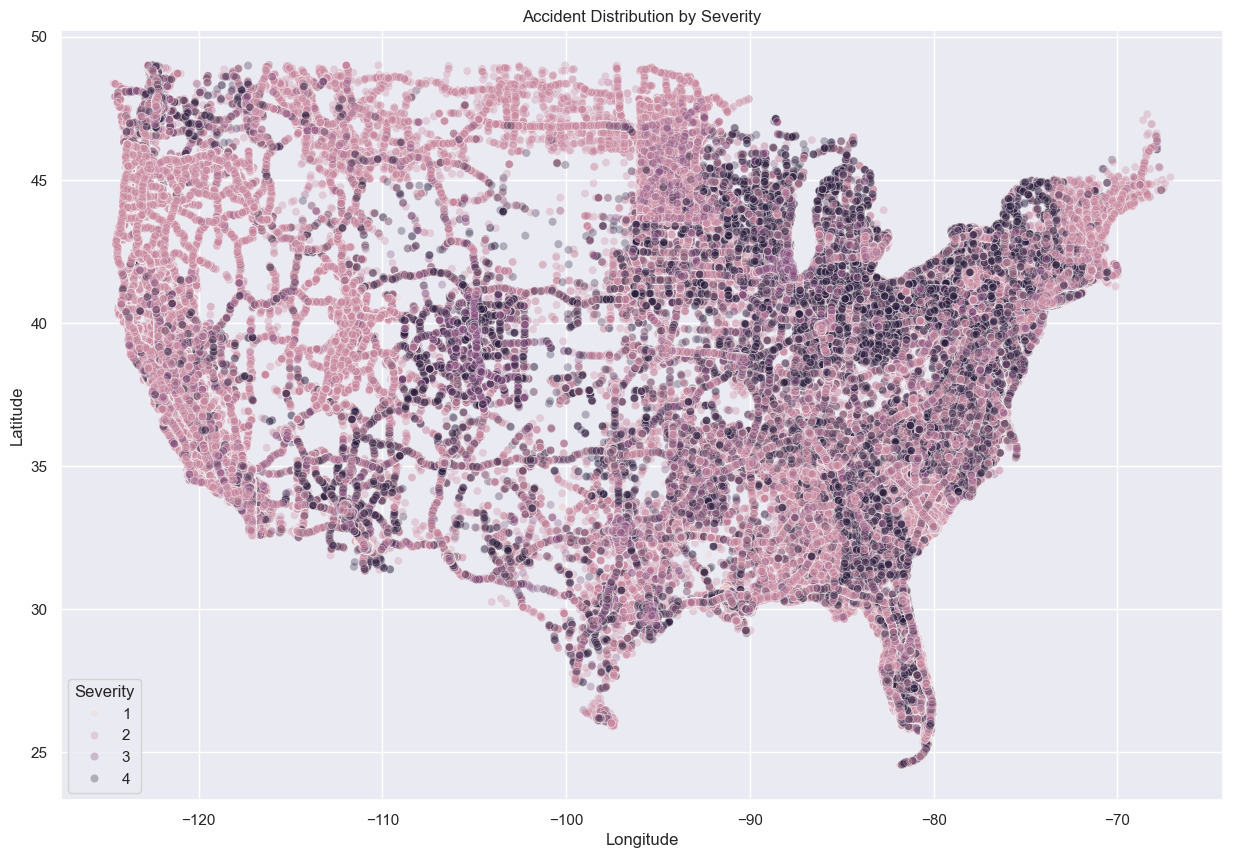

In [63]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=df, alpha=0.3)
plt.title("Accident Distribution by Severity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

<h3><b>12. Conclusion</b></h3>
<ul>
  <li><b>Miami</b> has the most traffic accidents among cities; <b>California</b> leads among states.</li>
  <li><b>2021</b> recorded the highest number of accidents.</li>
  <li>Accidents are most common during the <b>morning hours</b>, especially rush hour.</li>
  <li>Most accidents occurred during <b>fair weather</b>, highlighting factors other than climate.</li>
  <li>Severity level <b>2</b> is the most frequent, indicating moderate impact incidents.</li>
</ul>
<p>
This analysis can aid transportation departments and policymakers in focusing on hotspots 
and optimizing safety interventions across cities and states.
</p>